# Кейс A/B тестирование

In [1]:
#Импортируем библиотеки и загружаем файл, смотрим что внутри
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('AB_Test_Results.csv')

df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


In [2]:
#проверяем сколько человек попали в обе группы
df_userid = df.groupby(['USER_ID'])['VARIANT_NAME'].nunique().reset_index()
df_userid

,USER_ID,VARIANT_NAME
0,2,1
1,3,2
2,4,1
3,5,1
4,6,1
...,...,...
6319,9993,1
6320,9995,1
6321,9996,2
6322,9998,1


In [3]:
df_userid = df_userid[df_userid['VARIANT_NAME'] == 1]
df_userid

,USER_ID,VARIANT_NAME
0,2,1
2,4,1
3,5,1
4,6,1
5,9,1
...,...,...
6317,9990,1
6318,9992,1
6319,9993,1
6320,9995,1


In [4]:
#создаем дата-фрейм, где пользователи не дублируются
df_nondubl = df.merge(df_userid['USER_ID'], how='inner', on='USER_ID')
df_nondubl.sort_values(by='USER_ID')

,USER_ID,VARIANT_NAME,REVENUE
2014,2,control,0.0
2015,2,control,0.0
2013,2,control,0.0
5732,4,variant,0.0
5763,5,variant,0.0
...,...,...,...
2598,9992,control,0.0
5805,9993,control,0.0
2264,9995,variant,0.0
2263,9995,variant,0.0


In [5]:
df_nondubl = df_nondubl.drop_duplicates()
df_nondubl.sort_values(by='USER_ID')

,USER_ID,VARIANT_NAME,REVENUE
2013,2,control,0.0
5732,4,variant,0.0
5763,5,variant,0.0
5151,6,variant,0.0
3049,9,variant,0.0
...,...,...,...
5474,9990,variant,0.0
2598,9992,control,0.0
5805,9993,control,0.0
2263,9995,variant,0.0


<AxesSubplot:>

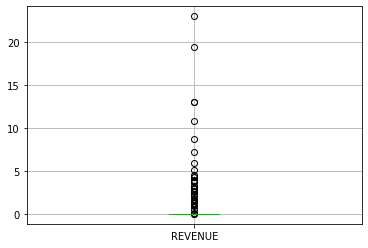

In [6]:
#смотрим как распределяется показатель у 1-ой группы
df_nondubl[df_nondubl.VARIANT_NAME == 'variant'].boxplot(column='REVENUE')

<AxesSubplot:>

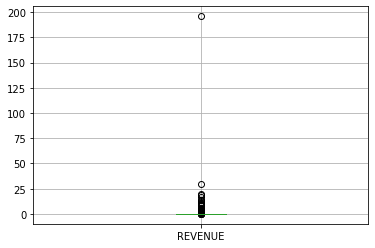

In [7]:
#смотрим как распределяется показатель у 2-ой группы
df_nondubl[df_nondubl.VARIANT_NAME == 'control'].boxplot(column='REVENUE')

In [8]:
#стат.распределение показателя 2-ой группы
df_nondubl['REVENUE'][df_nondubl.VARIANT_NAME == 'control'].describe()

count    2414.000000
mean        0.194930
std         4.151447
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       196.010000
Name: REVENUE, dtype: float64

In [9]:
#стат.распределение показателя 1-ой группы
df_nondubl['REVENUE'][df_nondubl.VARIANT_NAME == 'variant'].describe()

count    2407.000000
mean        0.074499
std         0.854413
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        23.040000
Name: REVENUE, dtype: float64

In [10]:
#количество пользователей по значению показателя 1-ой группы
df_nondubl[df_nondubl.VARIANT_NAME == 'variant'].groupby(['REVENUE'])['USER_ID'].count().reset_index()

,REVENUE,USER_ID
0,0.00,2364
1,0.02,1
2,0.04,1
3,0.06,1
4,0.50,1
5,0.60,1
6,0.90,1
7,1.00,1
8,1.01,1
9,1.23,1


In [11]:
#количество пользователей по значению показателя 2-ой группы
df_nondubl[df_nondubl.VARIANT_NAME == 'control'].groupby(['REVENUE'])['USER_ID'].count().reset_index()

,REVENUE,USER_ID
0,0.00,2360
1,0.02,2
2,0.04,1
3,0.23,1
4,0.50,1
5,0.58,1
6,0.86,1
7,1.00,1
8,1.01,2
9,1.25,3


In [12]:
#удаление нулевые значений
df_nonzero = df_nondubl[df_nondubl['REVENUE'] != 0]
df_nonzero

,USER_ID,VARIANT_NAME,REVENUE
17,8927,variant,0.06
46,6429,control,3.25
114,6207,control,0.04
142,3331,variant,4.27
150,8110,variant,1.75
...,...,...,...
5793,2138,control,0.58
5820,8076,control,1.66
5868,6623,control,1.78
5960,6468,control,2.93


In [13]:
df_nonzero[df_nonzero['VARIANT_NAME'] == 'variant']['REVENUE'].mode()

0    1.25
Name: REVENUE, dtype: float64

In [14]:
df_nonzero[df_nonzero['VARIANT_NAME'] == 'control']['REVENUE'].mode()

0    1.25
1    4.33
Name: REVENUE, dtype: float64

In [15]:
df_nonzero[df_nonzero['VARIANT_NAME'] == 'variant']['REVENUE'].describe()

count    43.000000
mean      4.170233
std       4.932851
min       0.020000
25%       1.250000
50%       2.720000
75%       4.270000
max      23.040000
Name: REVENUE, dtype: float64

In [16]:
df_nonzero[df_nonzero['VARIANT_NAME'] == 'control']['REVENUE'].describe()

count     54.000000
mean       8.714074
std       26.627446
min        0.020000
25%        1.585000
50%        3.120000
75%        6.007500
max      196.010000
Name: REVENUE, dtype: float64

In [17]:
df_nonzero['REVENUE'].describe()

count     97.000000
mean       6.699794
std       20.180005
min        0.020000
25%        1.250000
50%        2.990000
75%        4.950000
max      196.010000
Name: REVENUE, dtype: float64

(array([43.,  8.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.000000e-02, 9.819500e+00, 1.961900e+01, 2.941850e+01,
        3.921800e+01, 4.901750e+01, 5.881700e+01, 6.861650e+01,
        7.841600e+01, 8.821550e+01, 9.801500e+01, 1.078145e+02,
        1.176140e+02, 1.274135e+02, 1.372130e+02, 1.470125e+02,
        1.568120e+02, 1.666115e+02, 1.764110e+02, 1.862105e+02,
        1.960100e+02]),
 <BarContainer object of 20 artists>)

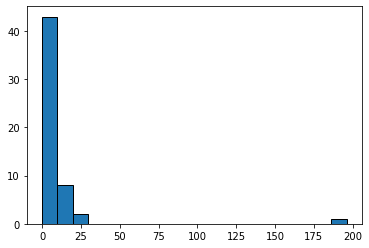

In [18]:
#проверка на нормальность
x = np.array(df_nonzero[df_nonzero['VARIANT_NAME'] == 'control']['REVENUE'])
y = np.array(df_nonzero[df_nonzero['VARIANT_NAME'] == 'variant']['REVENUE'])
plt.hist (x, edgecolor='black', bins=20)

(array([ 8., 12.,  7.,  7.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  2.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([2.0000e-02, 1.1710e+00, 2.3220e+00, 3.4730e+00, 4.6240e+00,
        5.7750e+00, 6.9260e+00, 8.0770e+00, 9.2280e+00, 1.0379e+01,
        1.1530e+01, 1.2681e+01, 1.3832e+01, 1.4983e+01, 1.6134e+01,
        1.7285e+01, 1.8436e+01, 1.9587e+01, 2.0738e+01, 2.1889e+01,
        2.3040e+01]),
 <BarContainer object of 20 artists>)

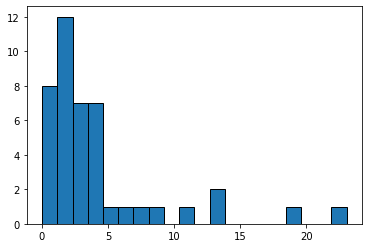

In [19]:
plt.hist (y, edgecolor='black', bins=20)

In [20]:
res = stats.shapiro(x)
_,p = stats.shapiro(x)
print("Шапиро Тест на нормальность для контрольной группы:", res)
if p<0.05:
    print("Выборка контрольной группы отличается от нормального распределения")
else:
    print("Выборка контрольной группы имеет нормальное распределение")

res = stats.shapiro(y)
print("Шапиро Тест на нормальность для тестовой группы:", res)
_,p = stats.shapiro(y)

if p<0.05:
    print("Выборка тестовой группы отличается от нормального распределения")
else:
    print("Выборка тестовой группы имеет нормальное распределение")

Шапиро Тест на нормальность для контрольной группы: ShapiroResult(statistic=0.2597762942314148, pvalue=5.154708786008454e-15)
Выборка контрольной группы отличается от нормального распределения
Шапиро Тест на нормальность для тестовой группы: ShapiroResult(statistic=0.7053307294845581, pvalue=5.565097893622806e-08)
Выборка тестовой группы отличается от нормального распределения


In [21]:
res = stats.kstest(x, stats.norm.cdf)
_,p = stats.kstest(x, stats.norm.cdf)
print("Тест Колмагорова-Смирнова на нормальность для контрольной группы:", res)
if p<0.05:
    print("Выборка контрольной группы отличается от нормального распределения")
else:
    print("Выборка контрольной группы имеет нормальное распределение")

res = stats.kstest(y, stats.norm.cdf)
print("Тест Колмагорова-Смирнова на нормальность для тестовой группы:", res)
_,p = stats.kstest(y, stats.norm.cdf)

if p<0.05:
    print("Выборка тестовой группы отличается от нормального распределения")
else:
    print("Выборка тестовой группы имеет нормальное распределение")

Тест Колмагорова-Смирнова на нормальность для контрольной группы: KstestResult(statistic=0.7117151164389133, pvalue=3.9773520418655274e-28)
Выборка контрольной группы отличается от нормального распределения
Тест Колмагорова-Смирнова на нормальность для тестовой группы: KstestResult(statistic=0.7046049359464012, pvalue=5.593497608670862e-22)
Выборка тестовой группы отличается от нормального распределения


<AxesSubplot:>

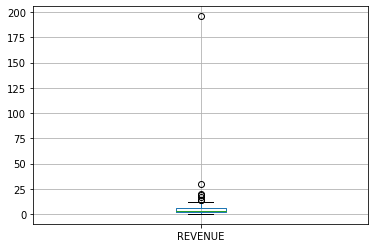

In [22]:
df_nonzero[df_nonzero.VARIANT_NAME == 'control'].boxplot(column='REVENUE')

In [23]:
df_nonzero[df_nonzero.VARIANT_NAME == 'control']['REVENUE'].describe()

count     54.000000
mean       8.714074
std       26.627446
min        0.020000
25%        1.585000
50%        3.120000
75%        6.007500
max      196.010000
Name: REVENUE, dtype: float64

count    43.000000
mean      4.170233
std       4.932851
min       0.020000
25%       1.250000
50%       2.720000
75%       4.270000
max      23.040000
Name: REVENUE, dtype: float64

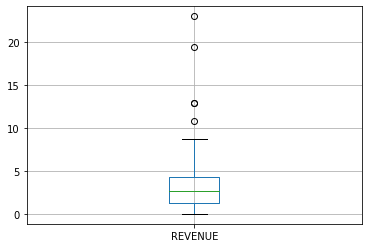

In [24]:
df_nonzero[df_nonzero.VARIANT_NAME == 'variant'].boxplot(column='REVENUE')
df_nonzero[df_nonzero.VARIANT_NAME == 'variant']['REVENUE'].describe()

,USER_ID,REVENUE
count,41.000000,41.000000
mean,4705.414634,2.473415
std,2928.813249,1.619788
min,124.000000,0.020000
25%,2138.000000,1.250000
50%,5063.000000,2.170000
75%,7103.000000,3.790000
max,9766.000000,6.350000


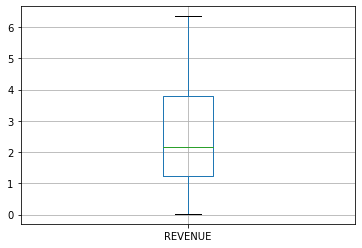

In [25]:
#удаление выбросов из контрольной группы
x = np.array(df_nonzero[(df_nonzero['VARIANT_NAME'] == 'control') & (df_nonzero['REVENUE'] < 8)]['REVENUE'])
df_nonzero[(df_nonzero['VARIANT_NAME'] == 'control') & (df_nonzero['REVENUE'] < 8)].boxplot(column='REVENUE')
df_nonzero[(df_nonzero['VARIANT_NAME'] == 'control') & (df_nonzero['REVENUE'] < 8)].describe()

,USER_ID,REVENUE
count,41.000000,41.000000
mean,5286.682927,3.336829
std,3116.180149,3.175527
min,56.000000,0.020000
25%,3326.000000,1.250000
50%,4995.000000,2.500000
75%,8110.000000,3.980000
max,9928.000000,12.990000


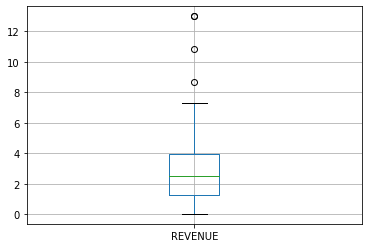

In [26]:
#удаление выбросов из тестовой группы
y = np.array(df_nonzero[(df_nonzero['VARIANT_NAME'] == 'variant') & (df_nonzero['REVENUE'] < 16)]['REVENUE'])
df_nonzero[(df_nonzero['VARIANT_NAME'] == 'variant') & (df_nonzero['REVENUE'] < 16)].boxplot(column='REVENUE')
df_nonzero[(df_nonzero['VARIANT_NAME'] == 'variant') & (df_nonzero['REVENUE'] < 16)].describe()

In [27]:
res = stats.wilcoxon (x, y)
_, p = stats.wilcoxon (x, y)
print("Применяем непараметрический критерий Манна-Уитни")
if p<0.05:
    print("Отвергаем нулевую гипотезу об одинаковости распределения выборок")
else:
    print("Нет оснований отклонить нулевую гипотезу об одинаковости распределения выборок")
print(res)

Применяем непараметрический критерий Манна-Уитни
Нет оснований отклонить нулевую гипотезу об одинаковости распределения выборок
WilcoxonResult(statistic=342.5, pvalue=0.2541415379387173)
